## Customer Segmentation : Customer Shopping Latest Trends Dataset
- __Name__: Fariz Erawan
- __Email__: farizerawan476@gmail.com

### 1. Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore")

### 2. Data Wrangling

In [2]:
main_df = pd.read_csv('shopping_trends_labeled.csv')
main_df.head()

,age,gender,category,purchase_amount,location,size,season,review_rating,subscription,payment_method,shipping_type,discount_apply,previous_purchase,preffered_payment,freq_purchase,cluster
0,55,Male,Clothing,53.0,Southeast,L,Winter,3.1,Yes,Credit Card,Express,Yes,14.0,Venmo,Fortnightly,3
1,19,Male,Clothing,64.0,Northeast,L,Winter,3.1,Yes,Bank Transfer,Express,Yes,2.0,Cash,Fortnightly,0
2,50,Male,Clothing,73.0,Northeast,S,Spring,3.1,Yes,Cash,Free Shipping,Yes,23.0,Credit Card,Weekly,0
3,21,Male,Footwear,90.0,Northeast,M,Spring,3.5,Yes,PayPal,Next Day Air,Yes,49.0,PayPal,Weekly,1
4,45,Male,Clothing,49.0,West,M,Spring,2.7,Yes,Cash,Free Shipping,Yes,31.0,PayPal,Annually,2


In [3]:
main_df.sample(10)

,age,gender,category,purchase_amount,location,size,season,review_rating,subscription,payment_method,shipping_type,discount_apply,previous_purchase,preffered_payment,freq_purchase,cluster
832,58,Male,Outerwear,80.0,West,L,Fall,2.5,Yes,Credit Card,Express,Yes,28.0,Cash,Bi-Weekly,1
1472,39,Male,Accessories,24.0,Midwest,L,Spring,3.5,No,Bank Transfer,Store Pickup,Yes,11.0,Cash,Weekly,3
1481,64,Male,Clothing,33.0,Southeast,S,Spring,3.3,No,Credit Card,Standard,Yes,31.0,PayPal,Quarterly,2
1562,37,Male,Accessories,75.0,Southeast,M,Winter,3.2,No,Credit Card,Next Day Air,Yes,23.0,Venmo,Bi-Weekly,0
2979,31,Female,Clothing,91.0,Southwest,L,Fall,2.6,No,PayPal,Next Day Air,No,14.0,PayPal,Weekly,0
2815,33,Female,Clothing,67.0,West,L,Fall,3.9,No,Cash,Free Shipping,No,40.0,Venmo,Every 3 Months,1
1386,68,Male,Outerwear,56.0,West,M,Fall,4.0,No,Bank Transfer,Next Day Air,Yes,4.0,Debit Card,Quarterly,3
2015,57,Male,Accessories,82.0,Southeast,S,Summer,4.5,No,Debit Card,Next Day Air,No,8.0,Credit Card,Fortnightly,0
2582,19,Male,Clothing,98.0,Midwest,S,Fall,3.6,No,Venmo,2-Day Shipping,No,4.0,Venmo,Every 3 Months,0
2675,24,Female,Clothing,38.0,Southeast,M,Winter,3.4,No,Cash,Free Shipping,No,38.0,Cash,Bi-Weekly,2


In [4]:
main_df.shape

(3900, 16)

In [5]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3900 non-null   int64  
 1   gender             3900 non-null   object 
 2   category           3900 non-null   object 
 3   purchase_amount    3900 non-null   float64
 4   location           3900 non-null   object 
 5   size               3900 non-null   object 
 6   season             3900 non-null   object 
 7   review_rating      3900 non-null   float64
 8   subscription       3900 non-null   object 
 9   payment_method     3900 non-null   object 
 10  shipping_type      3900 non-null   object 
 11  discount_apply     3900 non-null   object 
 12  previous_purchase  3900 non-null   float64
 13  preffered_payment  3900 non-null   object 
 14  freq_purchase      3900 non-null   object 
 15  cluster            3900 non-null   int64  
dtypes: float64(3), int64(2),

### 3. Data Splitting

In [6]:
shop_customer = main_df.copy()
select_columns = ['gender', 'purchase_amount', 'subscription', 'discount_apply', 'previous_purchase', 'cluster']

Feature selection results from `notebook_clustering`

In [7]:
label_encoder = LabelEncoder()

categorical_columns = ['gender', 'subscription', 'discount_apply']

for column in categorical_columns:
    main_df[column] = label_encoder.fit_transform(main_df[column])

In [8]:
scaler = MinMaxScaler()

numeric_columns = ['purchase_amount', 'previous_purchase', 'cluster']
main_df[numeric_columns] = scaler.fit_transform(main_df[numeric_columns])
data = main_df[select_columns]

data.head()

,gender,purchase_amount,subscription,discount_apply,previous_purchase,cluster
0,1,0.4125,1,1,0.265306,1.000000
1,1,0.5500,1,1,0.020408,0.000000
2,1,0.6625,1,1,0.448980,0.000000
3,1,0.8750,1,1,0.979592,0.333333
4,1,0.3625,1,1,0.612245,0.666667


Data splitting

In [9]:
data['cluster'] = data['cluster'].astype(int)

X = data.drop(columns=['cluster'])
y = data['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Amount of data: ",len(X))
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Amount of data:  3900
Training set shape: X_train=(3120, 5), y_train=(3120,)
Test set shape: X_test=(780, 5), y_test=(780,)


### Building a Classification Model

#### Classification Model

In [10]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)
 
print("Model training completed.")

Model training completed.


Each classification algorithm is trained separately using the training data. The KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, SVC, and GaussianNB models are prepared and trained. After the training process is complete, these models are ready to be tested on the test data.

#### Model Evaluation

In [11]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

summary_df = pd.DataFrame(rows)

print(summary_df)


                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.987179   0.970588  0.980198  0.975369
1            Decision Tree (DT)  0.998718   1.000000  0.995050  0.997519
2            Random Forest (RF)  1.000000   1.000000  1.000000  1.000000
3  Support Vector Machine (SVM)  0.969231   0.915888  0.970297  0.942308
4              Naive Bayes (NB)  0.956410   1.000000  0.831683  0.908108


In [12]:
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"True Positive (TP): {metrics['True Positive (TP)']}")
    print(f"False Positive (FP): {metrics['False Positive (FP)']}")
    print(f"False Negative (FN): {metrics['False Negative (FN)']}")
    print(f"True Negative (TN): {metrics['True Negative (TN)']}")
    print("-" * 50)

Model: K-Nearest Neighbors (KNN)
True Positive (TP): 198
False Positive (FP): 6
False Negative (FN): 4
True Negative (TN): 572
--------------------------------------------------
Model: Decision Tree (DT)
True Positive (TP): 201
False Positive (FP): 0
False Negative (FN): 1
True Negative (TN): 578
--------------------------------------------------
Model: Random Forest (RF)
True Positive (TP): 202
False Positive (FP): 0
False Negative (FN): 0
True Negative (TN): 578
--------------------------------------------------
Model: Support Vector Machine (SVM)
True Positive (TP): 196
False Positive (FP): 18
False Negative (FN): 6
True Negative (TN): 560
--------------------------------------------------
Model: Naive Bayes (NB)
True Positive (TP): 168
False Positive (FP): 0
False Negative (FN): 34
True Negative (TN): 578
--------------------------------------------------


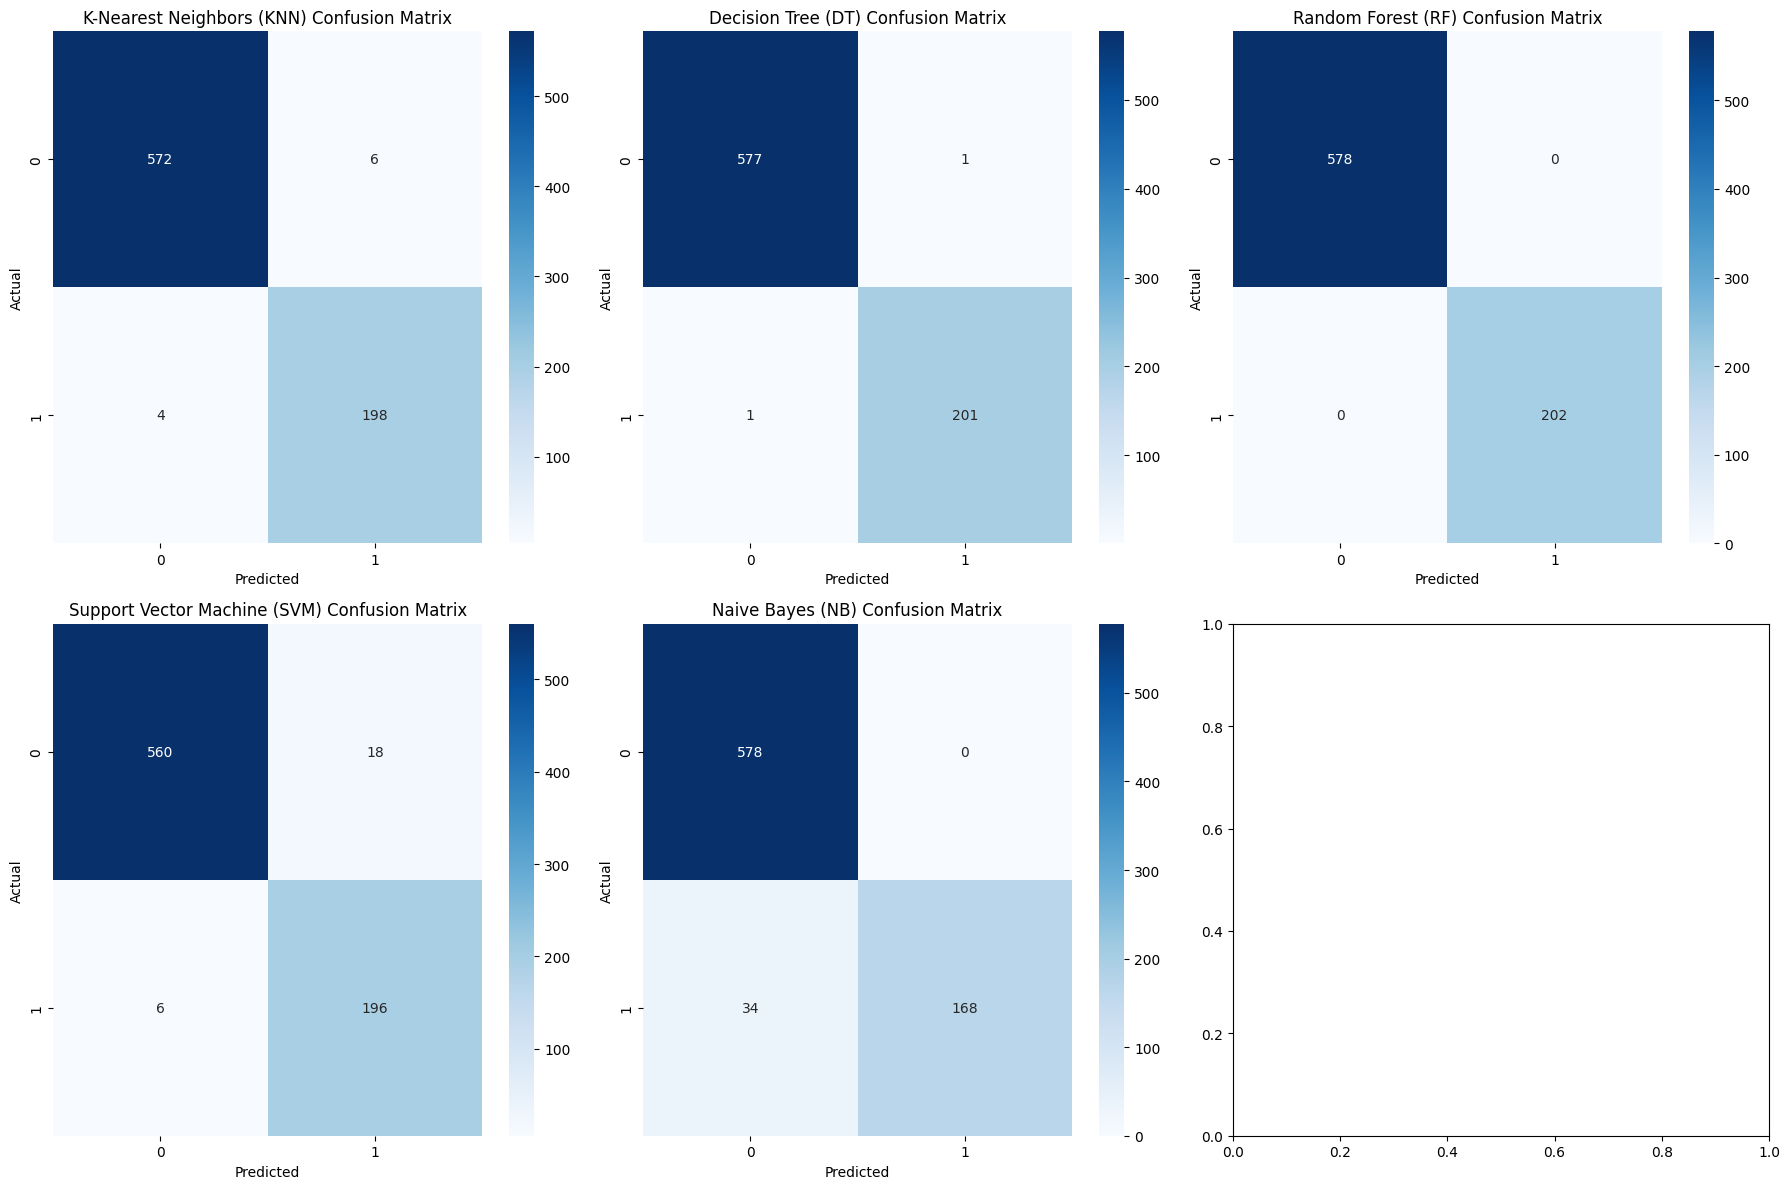

In [13]:
# Model Names
model_names = ["K-Nearest Neighbors (KNN)", "Decision Tree (DT)", "Random Forest (RF)", 
               "Support Vector Machine (SVM)", "Naive Bayes (NB)"]

# Confusion Matrices
conf_matrices = {
    model_names[0]: np.array([[572, 6], [4, 198]]),  # KNN
    model_names[1]: np.array([[577, 1], [1, 201]]),  # Decision Tree
    model_names[2]: np.array([[578, 0], [0, 202]]),    # Random Forest
    model_names[3]: np.array([[560, 18], [6, 196]]), # SVM
    model_names[4]: np.array([[578, 0], [34, 168]])  # Naive Bayes
}

# Plot each confusion matrix
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (model, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"], ax=axes[i])
    axes[i].set_title(f"{model} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()


Insight
- K-Nearest Neighbors (KNN) → Tends to have many False Negatives.
- Decision Tree (DT) → Fairly good performance with few errors.
- Random Forest (RF) → Almost perfect, with very little error.
- Support Vector Machine (SVM) → Has higher False Positives than RF/DT.
- Naive Bayes (NB) → Has quite high False Positives.

From this confusion matrix, we can see that Random Forest has the best performance with the least error.

<Figure size 1200x600 with 0 Axes>

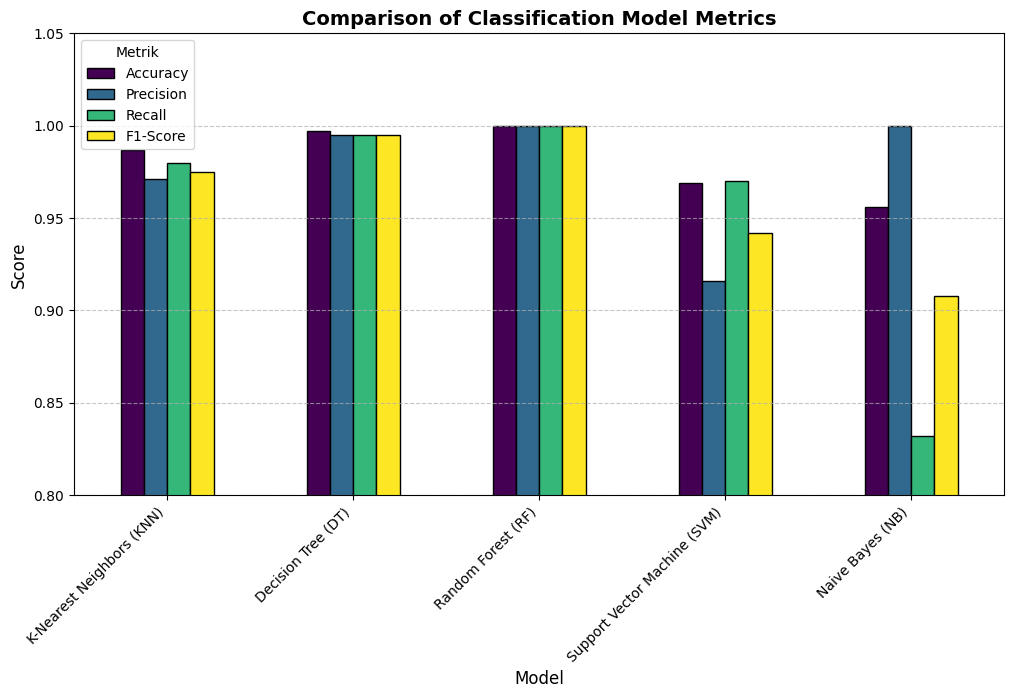

In [14]:
summary_df = pd.DataFrame({
    'Model': [
        'K-Nearest Neighbors (KNN)',
        'Decision Tree (DT)',
        'Random Forest (RF)',
        'Support Vector Machine (SVM)',
        'Naive Bayes (NB)'
    ],
    'Accuracy': [0.987, 0.997, 1.000, 0.969, 0.956],
    'Precision': [0.971, 0.995, 1.000, 0.916, 1.000],
    'Recall': [0.980, 0.995, 1.000, 0.970, 0.832],
    'F1-Score': [0.975, 0.995, 1.000, 0.942, 0.908]
})

plt.figure(figsize=(12, 6))
summary_df.set_index('Model').plot(kind='bar', figsize=(12, 6), colormap='viridis', edgecolor='black')
plt.title('Comparison of Classification Model Metrics', fontsize=14, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0.8, 1.05)
plt.legend(title='Metrik', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Classification Model Analysis

- 📌Random Forest (RF)

    - Accuracy, Precision, Recall, and F1-Score: 100%
    - This model showed perfect performance, meaning it was able to classify all data correctly without error.

- 📌Decision Tree (DT)

    - Accuracy: 99.7%, then Precision, Recall, and F1-Score: 99.5%
    - Almost perfect performance, only slightly below Random Forest.

- 📌K-Nearest Neighbors (KNN)

    - Accuracy: 98.7%, Precision: 97.1%, Recall: 98.1%, F1-Score: 97.5%
    - Still quite good, but more susceptible to poorly distributed data.

- 📌Support Vector Machine (SVM)

    - Accuracy: 96.9%, Precision: 91.5%, Recall: 97.0%, F1-Score: 94.2%
    - Fairly stable performance, but inferior to RF and DT.

- 📌Naive Bayes (NB)

    - Accuracy: 95.6%, Precision: 100%, Recall: 83.1%, F1-Score: 90.8%
    - Precision reaches 100%, but recall is low (83.2%), meaning this model misses potential churn customers more often.

Conlusion

`Random Forest` is the best performing model, outperforming the other models in terms of accuracy, precision, recall, and F1-Score. This demonstrates its ability to identify churn customers better and more accurately.